# 한국 지도 그리기 (HeatMap style) 
 - <a href="http://nbviewer.jupyter.org/gist/hyeshik/cf9f3d7686e07eedbfda?revision=6">참조 1</a>
 - <a href="http://pinkwink.kr/1005">참조 2 : 원본 </a>

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

%matplotlib inline

In [2]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
data = pd.read_csv("data/data_draw_korea.csv", index_col=0, encoding='utf-8')

In [4]:
data.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [5]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [6]:
gamma = 0.75
blockedMap = data
targetData = '인구수'

In [7]:
whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

In [8]:
whitelabelmin

287659.25

In [9]:
datalabel = targetData

In [10]:
vmin = min(blockedMap[targetData])
vmax = max(blockedMap[targetData])

mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

In [17]:
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,43189.0,23612.0,20809.0,25589.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,331682.0,547202.0,41076.0,140159.0,76733.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,385528.0,955384.0,310292.0,434061.0,90398.0,191266.0,29260.0,24551.0,NaN,NaN,NaN
3,NaN,58296.0,326523.0,327111.0,464236.0,288543.0,140595.0,408220.0,610300.0,53497.0,264144.0,NaN,NaN,NaN
4,NaN,477567.0,805473.0,566558.0,554709.0,364232.0,114967.0,342429.0,391655.0,175676.0,62957.0,202520.0,NaN,NaN
5,NaN,68950.0,317785.0,381412.0,453634.0,383917.0,208603.0,279939.0,432028.0,150061.0,39668.0,86747.0,NaN,NaN
6,NaN,NaN,527153.0,668089.0,351837.0,484478.0,407416.0,342909.0,615487.0,95614.0,38439.0,34242.0,NaN,8392.0
7,NaN,105029.0,388535.0,555129.0,401233.0,222566.0,526157.0,63227.0,290210.0,100669.0,313851.0,44175.0,NaN,NaN
8,17735.0,299734.0,505791.0,200793.0,173061.0,273302.0,149080.0,911628.0,190537.0,67919.0,34966.0,63986.0,NaN,NaN


 - 한국 지도를 그리는 방법은 적당히 위치(x,y)를 잡고, 도 혹은 광역시별 경계선을 그리고, 데이터를 배치하고 colormap을 적용시키는 과정을 거칩니다.

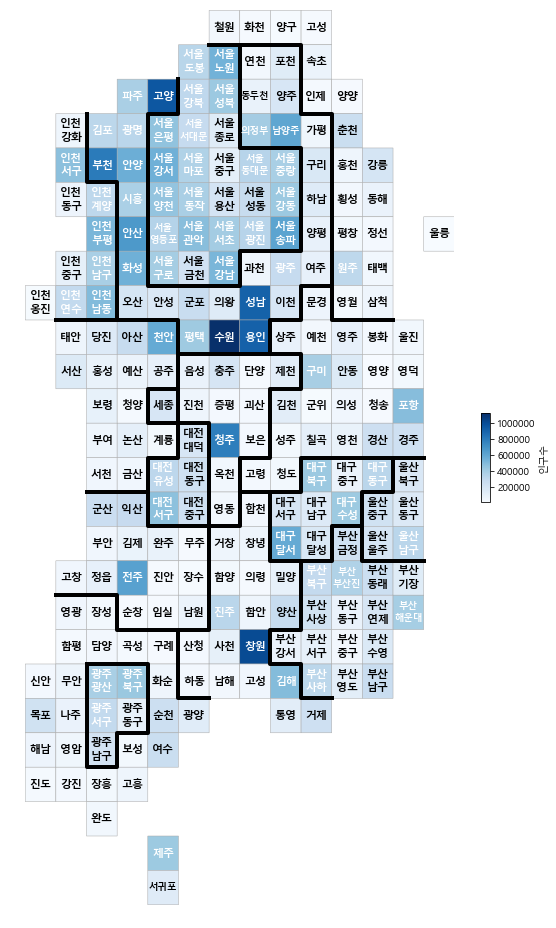

In [11]:
cmapname = 'Blues' #'Reds'

plt.figure(figsize=(8, 13))
plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

# 지역 이름 표시
for idx, row in blockedMap.iterrows():
    annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
    if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
        dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
        if len(row['행정구역']) <= 2:
            dispname += row['행정구역'][-1]
    else:
        dispname = row['행정구역'][:-1]

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', color=annocolor,
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=4)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')
    
cb = plt.colorbar(shrink=.1, aspect=10)
cb.set_label(datalabel)

plt.tight_layout()
plt.show()

## 코드 함수화 

In [12]:
def drawKorea(targetData, blockedMap, d1, d2, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

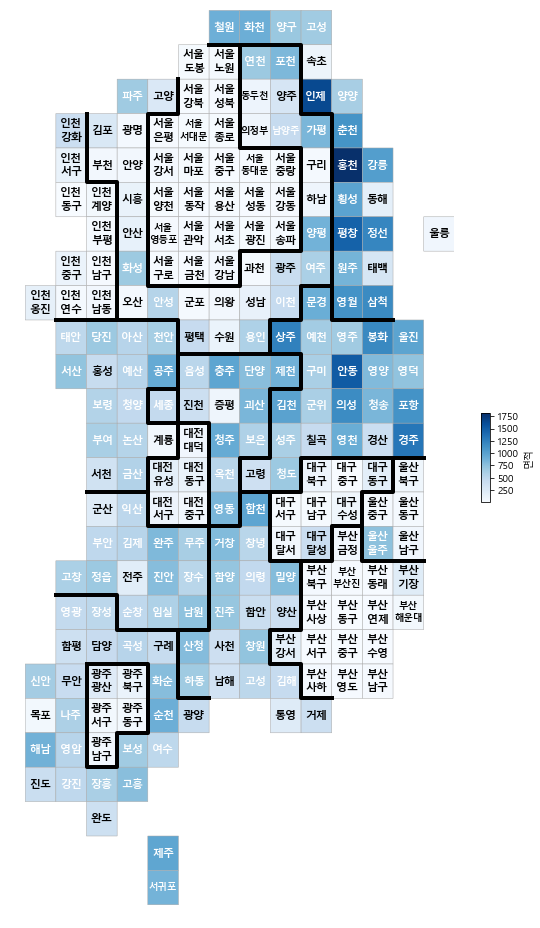

In [13]:
drawKorea('면적', data, '광역시도', '행정구역', 'Blues')

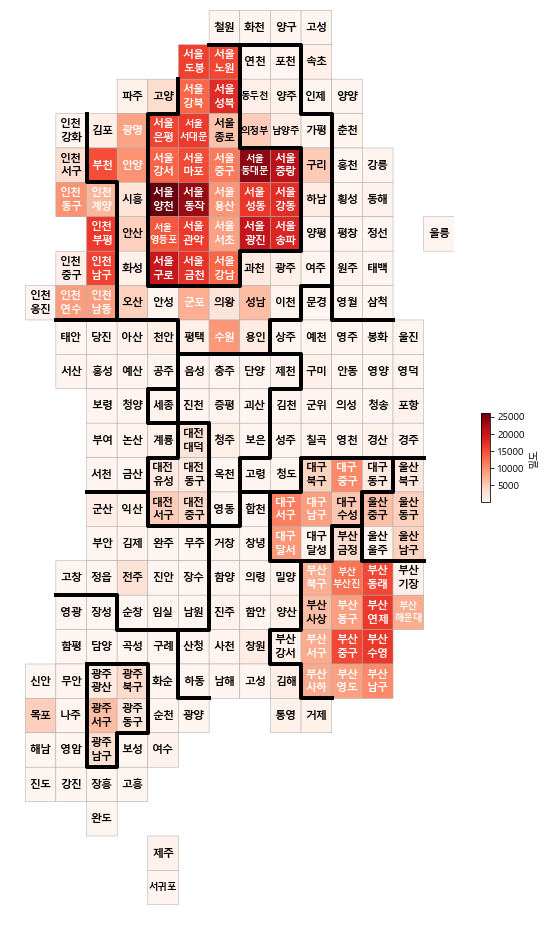

In [14]:
data['밀도'] = data['인구수']/data['면적']
drawKorea('밀도', data, '광역시도', '행정구역', 'Reds')